# $M_D$ vs $v_S\approx m_{\chi^0_1}$ analog to the SD majorana DM: $h_d=0.1$

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# PMNS matrix 2018 to $3\sigma$ https://arxiv.org/abs/1708.01186

In [3]:
import NEUTRINO2018
import neutrino_analytic2

In [4]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 25

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MDF = np.exp(np.random.uniform(np.log(10**(2)),np.log(2.*10**(3))))
    MS12 = 8.0E+06
    MS22 = 7.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04     
    LamSP = 1.0E-01    #ms ~ sqrt(2*lambdaS)*vs -> bigg, i.e. mh2 heavier
    vS = np.exp(np.random.uniform(np.log(np.sqrt(2)*10**(1)),np.log(np.sqrt(2)*2.*10**(4))))
    YRD = 0.1
    YRC = 1.0E-01
    
    ###  NEUTRINO EXPERIMENTAL VALUES ###################################################
    #phases of the PMNS matrix and the R 
    phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
    delta = phases1[0]
    eta1 = phases1[1]
    eta2 = phases1[2]
    #light neutrino masses (up 3 sigma range) NH (NO)
    #mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
    #Zero in this framework
    mnu1 = 1.0e-20
    mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1.0e-18+mnu1**2)
    mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1.0e-18+mnu1**2)
    #mixing angles (up 3 sigma range) NH
    t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
    t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
    t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))
    #Building PMNS matrix NH
    UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
    UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
    UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
    Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
    U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))
    #Defining the U elementes. readeable
    U11 = np.real(U[0,0])
    U12 = np.real(U[0,1])
    U13 = np.real(U[0,2])
    U21 = np.real(U[1,0])
    U22 = np.real(U[1,1])
    U23 = np.real(U[1,2])
    U31 = np.real(U[2,0])
    U32 = np.real(U[2,1])
    U33 = np.real(U[2,2])
    
    ### Algoritm to compute LAMBDAi elements
    MS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    MS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
    M1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M1']
    M2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M2']
    vv12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    vv22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    uu11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    uu21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
    L1 = neutrino_analytic2.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic2.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS2,vv22,uu21)
    
    #####  ALGORITM: Particular case(see): inversion-neutrino-matrix.nb ######################
    a11 = 0.0
    a12 = 0.0 
    ### Random -> FREE PARAMETERS
    a21 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    ### Solved in Mathematica
    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
    
    ###  Modify the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    ###  Modify the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %a11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %a21    
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %a31     
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %a12  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %a22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %a32        
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %b11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %b21     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %b31 
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %b12  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %b22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %b32      
    
    ###  Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    ### Run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    ###  Run micromegas and take the relic density. 
    #mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega')
    mo = subprocess.getoutput('~/Work/micromegas_4.2.5/SDdiracDM/./CalcOmega_with_DI_Detection') #Full
    
    if len(mo.split()) == 2:
        continue
    
    Omega = eval(mo.split('Omega h^2=')[1].split()[0])
    print("n=",n,"Omega=",Omega)
    
    # Choose Omega at to 3 sigma
    '''if Omega > 0.12800:
        continue
    if Omega < 0.11180:
        continue'''
    #print(Omega)
    
    ### Direct Detection: CDM-nucleon cross sections[pb]
    PSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[2])
    PSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[4])
    NSI = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[7])
    NSD = eval(mo.split('CDM-nucleon cross sections[pb]:')[1].split()[9])
    ### Indirect Detection: annihilation cross section vcs[cm^3/s]
    sv = eval(mo.split('annihilation cross section')[1].split()[0])
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])
    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])
    
    ### EWPO
    T = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[5])
    S = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[11])
    U = eval(SPheno_output.split('Block SPhenoLowEnergy')[1].split()[17])
    ### LFV
    mueg = eval(SPheno_output.split('Block FlavorKitLFV')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,a11,a21,a31,a12,a22,a32,\
              b11,b21,b31,b12,b22,b32,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM,Omega,PSI,PSD,NSI,NSD,T,S,U,mueg])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13'\
                           ,'YRB21','YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha'\
                           ,'mChi1','mChi2','XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'\
                          ,'Omega','PSI','PSD','NSI','NSD','T','S','U','mueg'])
xd.to_csv('xd_scan01.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

n= 0 Omega= 192.0
n= 1 Omega= 0.00106
n= 2 Omega= 0.0591
n= 3 Omega= 169.0
n= 12 Omega= 1.68
n= 13 Omega= 0.018
n= 14 Omega= 254.0
n= 15 Omega= 23400.0
n= 17 Omega= 5340.0
n= 19 Omega= 16.0
The program spent 33.7307026386261 s running 25 times


In [5]:
681/60.

11.35

In [6]:
#Concatenar files
xd0 = pd.read_csv('hc01hd01.csv')
xdnew = pd.read_csv('xd_scan01.csv')

xd = pd.concat([xd0, xdnew],ignore_index=True)
del xd['Unnamed: 0']

print(xd0.shape,xdnew.shape,xd.shape)

(1352, 52) (10, 52) (1362, 51)


In [7]:
#save file
xd.to_csv('hc01hd01.csv')

In [8]:
xd = pd.read_csv('hc01hd01.csv')
del xd['Unnamed: 0']

In [9]:
xd[['YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21','YRB22','YRB23','mChi1','Omega']][:3]

,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,YRB11,YRB12,YRB13,YRB21,YRB22,YRB23,mChi1,Omega
0,0.0,0.000794,0.000202,0.0,0.074495,0.115051,-1.930351e-07,0.000022,0.000035,-4.559367e-08,-2.581159e-07,-2.761053e-07,82.634568,21.1000
1,0.0,0.000244,0.000166,0.0,0.020637,0.009778,-4.704837e-05,-0.000281,-0.000328,4.073583e-07,2.907663e-06,3.604146e-06,185.938037,0.0225
2,0.0,0.000606,0.402987,0.0,0.028766,0.455674,3.678720e-06,0.000002,-0.000006,-3.263367e-06,-2.961813e-06,3.412389e-06,1.670441,747000.0000


In [10]:
print("Experimental values   :",mnu2, mnu3)
print(" ")
print("Inversion-SPHENO      :",mv2,  mv3)

Experimental values   : 8.599270349170537e-12 4.993033924838907e-11
 
Inversion-SPHENO      : 8.66614436e-12 4.98718219e-11


In [11]:
print("RUTINE: ",'%.5f' %M1, '%.5f' %M2)
#
print("SPEHENO:",'%.5f' %mChi1 , '%.5f' %mChi2)

RUTINE:  155.67247 190.41358
SPEHENO: 59.55729 345.60494


# Analytical diagonalization rutine for Neutrino mass matriz

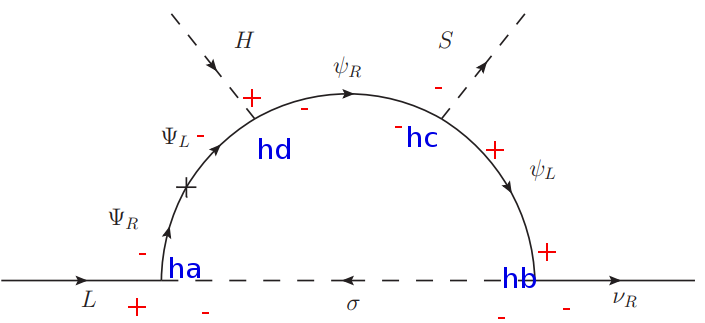

In [12]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [13]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [14]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']][:2]

,mv1,mn1,mv2,mn2,mv3,mn3
0,2.665120e-19,6.133174e-19,8.922050e-12,1.021438e-11,4.970494e-11,4.341626e-11
1,2.876047e-19,1.226635e-18,8.619015e-12,4.599940e-12,5.021336e-11,9.408571e-11


# PLOTS

In [15]:
#good plots
plt.rcParams.update({'font.size': 20}) 
#plt.rc('font',size='18')

In [16]:
#Experimental values for DM: Planck results 2015
e = 3
Omega = 0.1197
Omega_max=Omega + e*0.0022
Omega_min=Omega - e*0.0022
print (Omega, Omega_min,Omega_max)
# out: (0.1197, 0.1131, 0.1263)

0.1197 0.1131 0.1263


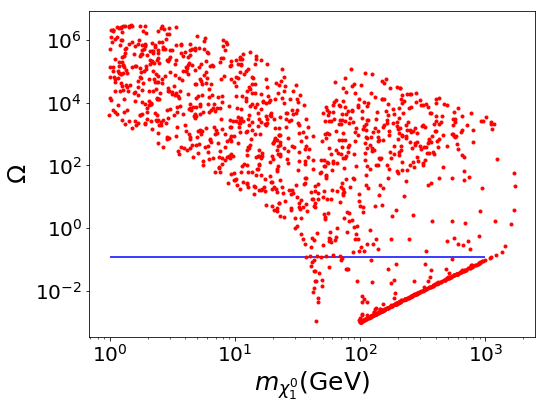

In [17]:
plt.figure(figsize=(8,6))

plt.loglog(xd.mChi1,xd.Omega,'r.')
plt.hlines(Omega,1,1e3, 'b',label=r'0.11')

#plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$m_{\chi^0_1}$(GeV)',size=25)
plt.ylabel(r'$\Omega$',size=25)
#plt.xlim(10,5e3)
#plt.ylim(11.2e-2,1.3e-1)

plt.show()

cuts

Maximun values: Some elements tend to be small

In [18]:
print(np.abs(xd.YRB11).max(),np.abs(xd.YRB12).max(),np.abs(xd.YRB13).max())
print(np.abs(xd.YRB21).max(),np.abs(xd.YRB22).max(),np.abs(xd.YRB23).max())

0.01360499508934025 0.024909225269742843 0.029442685160501438
0.008813601717032033 0.044736286048057 0.05285353331289255


In [19]:
xDM1 = xd[np.logical_and(xd.Omega>Omega_max, 1>0)]
xDM2 = xd[np.logical_and(xd.Omega<Omega_min, 1>0)]

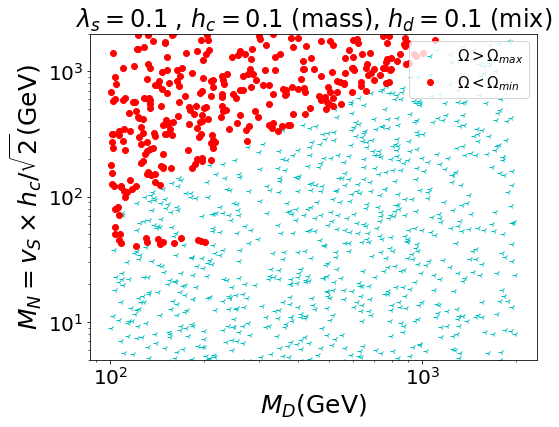

In [21]:
plt.figure(figsize=(8,6))

plt.loglog(xd.MDF, xd.vS*xd.YRC/np.sqrt(2),'c3',label=r'$\Omega > \Omega_{max}$')
plt.loglog(xDM2.MDF, xDM2.vS*xDM2.YRC/np.sqrt(2),'ro',label=r'$\Omega < \Omega_{min}$')

plt.title('$\lambda_s=0.1$ , $h_c=0.1$ (mass), $h_d=0.1$ (mix)')
plt.legend(prop={'size':15},loc='best')
plt.xlabel(r'$M_{D}$(GeV)',size=25)
plt.ylabel(r'$M_N=v_S \times h_c /\sqrt{2}$(GeV)',size=25)

plt.ylim(5,2e3)

plt.show()

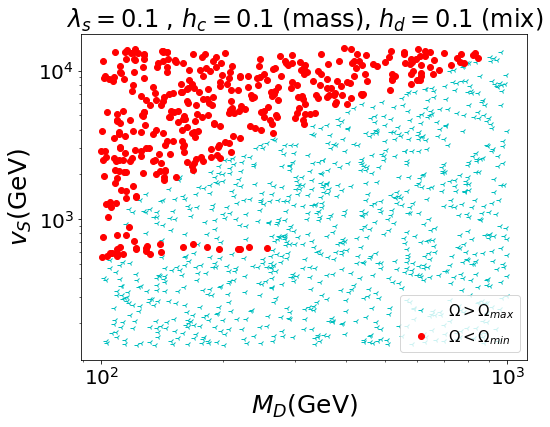